In [ ]:
!pip install -Uqq fastai fastbook

Paso 1: Descargar imágenes

In [ ]:
from fastcore.all import *
from fastbook import *

def search_images(term,max_images=100):
  print(f"Buscando imágenes de '{term}'")
  return search_images_ddg(term,max_images=max_images)
urls = search_images('mamografía mamas sanas', max_images=1)
urls[0]


Buscando imágenes de 'mamografía mamas sanas'


'https://1.bp.blogspot.com/-KdTRoGIjnes/X7DG9U1ABtI/AAAAAAAAARk/7FDlTQ1Gy8IWt14fShh4tlyjqfAMIWImQCLcBGAsYHQ/s800/mama.jpg'

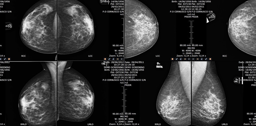

In [ ]:
from fastdownload import download_url
from fastai.vision.all import *
dest='mamografía_por_determinar.jpg'
download_url(urls[0],dest,show_progress=False)
im=Image.open(dest)
im.to_thumb(256,256)



Buscando imágenes de 'mamografía real cáncer de mama'


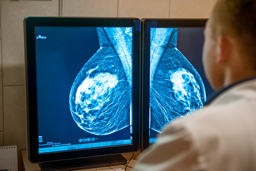

In [ ]:
download_url(search_images('mamografía real cáncer de mama',max_images=1)[0],'mamografía real cáncer de mama.jpg',show_progress=False)
Image.open('mamografía real cáncer de mama.jpg').to_thumb(256,256)

In [ ]:
searches = 'mamografía real mama sana','mamografía real cancer de mama'
path = Path('sano_o_cáncer')
from time import sleep

for o in searches:
  dest= path/o
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} imagen'))
  sleep(10)  # Pause between searches to avoid over-loading server
  download_images(dest, urls=search_images(f'{o} en hospital'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} diagnóstico'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)


Buscando imágenes de 'mamografía real mama sana imagen'
Buscando imágenes de 'mamografía real mama sana en hospital'
Buscando imágenes de 'mamografía real mama sana diagnóstico'
Buscando imágenes de 'mamografía real cancer de mama imagen'
Buscando imágenes de 'mamografía real cancer de mama en hospital'
Buscando imágenes de 'mamografía real cancer de mama diagnóstico'


Entrenar nuestro modelo

In [ ]:
#verificar si hay imágenesque no se pueden abrir correctamente/dañadas
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

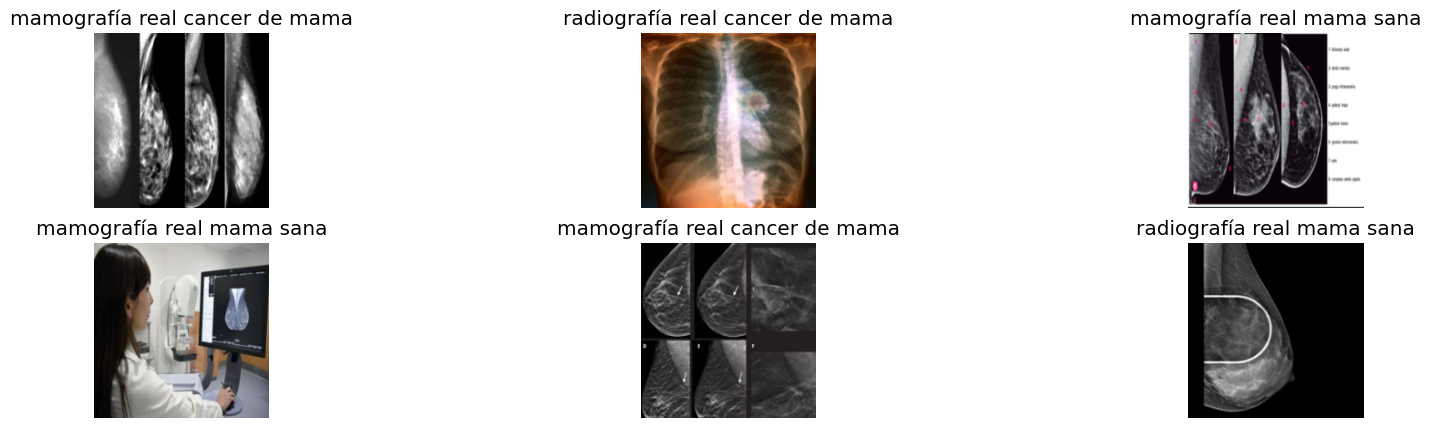

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms=[Resize(192, method='squish')]
    ).dataloaders(path, bs=32)
dls.show_batch(max_n=6, figsize=(20, 5))


Ahora estamos listos para entrenar nuestro modelo. El modelo utilizado es 'resnet50'. Fastai viene con un método útil llamado 'fine_tune()' que automáticamente utiliza las mejores prácticas para ajustar finamente un modelo pre-entrenado, así que usaremos eso.

In [ ]:
model = vision_learner(dls, resnet18, metrics=error_rate)
model.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.073028,1.486876,0.524775,00:10


epoch,train_loss,valid_loss,error_rate,time
0,1.632128,1.680894,0.490991,00:11
1,1.468544,1.244646,0.427928,00:10
2,1.174740,1.159299,0.434685,00:10


Vamos a probar nuestro modelo

In [ ]:
es_neum,_,prob = model.predict(PILImage.create('mamografía_por_determinar.jpg'))
print(f"Esto es un: {es_neum}.")
print(f"Probabilidad de que sea un una persona con cáncer de mama: {prob[0]:.4f}")

Esto es un: radiografía real mama sana.
Probabilidad de que sea un una persona con cáncer de mama: 0.0223
